<h1 align= 'center'> Image Classification using Convolutional Neural Network</h1>
<h3 align= 'center'> To Classify Photographs of Dogs and Cats </h3>

## The Challenge

The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.

Although the problem sounds simple, it was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification.

### Introduction

The dogs vs cats dataset refers to a dataset used for a Kaggle machine learning competition held in 2013.

The dataset is comprised of photos of dogs and cats provided as a subset of photos from a much larger dataset of 3 million manually annotated photos. The dataset was developed as a partnership between Petfinder.com and Microsoft.

It has become a good "Hello World" computer vision dataset for beginners when getting started with convolutional neural networks.

In [1]:
# Importing the Libraries
import matplotlib.pyplot as plt
import os

In [2]:
## Define location of dataset

train_location = '../input/dogs-vs-cats/'

train_dir = os.path.join(train_location, "train.zip")
test_dir = os.path.join(train_location, "test1.zip")

import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall()

with zipfile.ZipFile(test_dir,"r") as z:
    z.extractall()

## Plot Dog and Cat Photos

In [3]:
train_location = './train/'

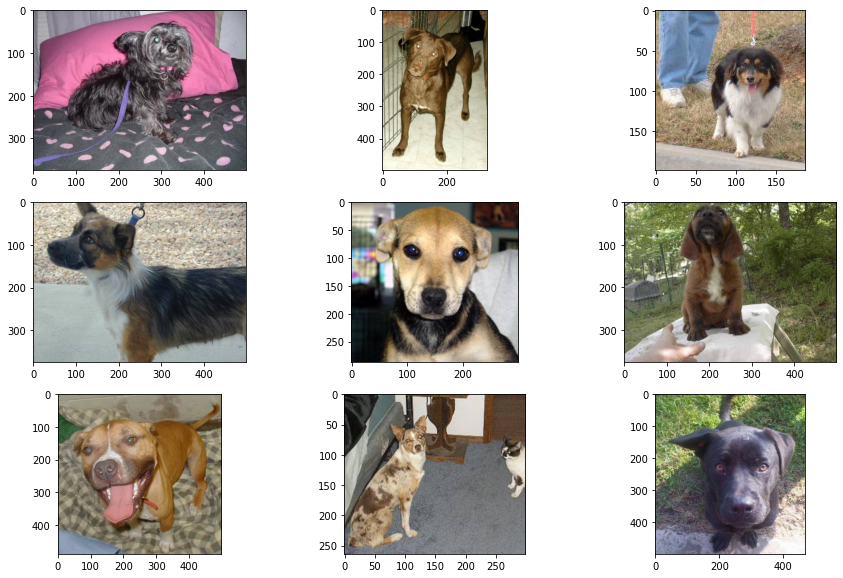

In [4]:
## Display first 9 Dog Images
plt.figure(figsize= (15,10))
for i in range(9):
  plt.subplot(331 + i)
  image = plt.imread(train_location + 'dog.' + str(i) + '.jpg')   ### Reads the image from the location specified by filename
  plt.imshow(image)   ## Displays a 2D array as an Image.
plt.show()

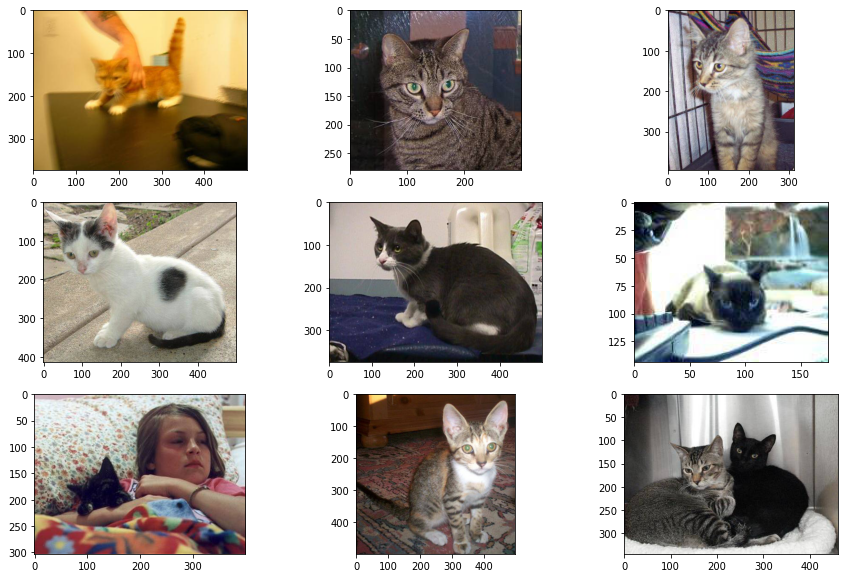

In [5]:
## Display first 9 Cat Images
plt.figure(figsize= (15,10))
for i in range(9):
  plt.subplot(331 + i)
  image = plt.imread(train_location + 'cat.' + str(i) + '.jpg')
  plt.imshow(image)
plt.show()

- Looking at these photos, we can see that the photos are colored and have different shapes and sizes.

- We can see a photo where the cat is barely visible (*bottom left corner (Cat Image)*) and another that has two cats (*lower right corner (Cat Image)*) also we could see that a photho has both dog and cat (*bottom middle corner (Dog Image)*). 

**This suggests that any classifier fit on this problem will have to be robust.**

## Select Standardized Photo Size

The photos will have to be reshaped prior to modeling so that all images have the same shape. This is often a small square image.

There are many ways to achieve this:
- The most common is a simple resize operation that will stretch and deform the aspect ratio of each image and force it into the new shape.

- We could also load all photos and look at the distribution of the photo widths and heights, then design a new photo size that best reflects what we are most likely to see in practice.

We can load the images progressively using the Keras ImageDataGenerator class and flow_from_directory() API. This will be slower to execute but will run on more machines.

This API prefers data to be divided into separate train/ and test/ directories, and under each directory to have a subdirectory for each class. 

> **Example:** a train/dog/ and a train/cat/ subdirectories and the same for test. Images are then organized under the subdirectories.

In [6]:
# importing os module
import os

# Create Directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # Create Label Subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)   ### Function to create directories in Python

In [7]:
from os import listdir
from shutil import copyfile
from random import seed
from random import random

# Seed Random Number Generator
seed(1)
# Ratio of Pictures to use for Validation
val_ratio = 0.30

# Copy training dataset images into subdirectories
for file in listdir(train_location):
    src = train_location + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

In [8]:
from keras.models import Sequential     ## A deep learning model.
from keras.layers import Dense, MaxPooling2D, Conv2D, Activation, Flatten, Dropout     ## Different Layers

# Transfer Learning

Transfer learning involves using all or parts of a model trained on a related task.

A useful model for transfer learning is one of the VGG models, such as VGG-16 with 16 layers that at the time it was developed, achieved top results on the ImageNet photo classification challenge.

The model is comprised of two main parts, the feature extractor part of the model that is made up of VGG blocks, and the classifier part of the model that is made up of fully connected layers and the output layer.

We can use the feature extraction part of the model and add a new classifier part of the model that is tailored to the dogs and cats dataset. Specifically, we can hold the weights of all of the convolutional layers fixed during training, and only train new fully connected layers that will learn to interpret the features extracted from the model and make a binary classification.

In [9]:
from keras.preprocessing.image import ImageDataGenerator
# Create Data Generator
datagen = ImageDataGenerator(featurewise_center = True)

# Prepare iterators
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/', class_mode='binary', batch_size=64, target_size=(224, 224))

Found 17495 images belonging to 2 classes.
Found 7505 images belonging to 2 classes.


In [13]:
from keras.applications.vgg16 import VGG16
# Create the Neural Network --> Transfer Learning
model6 = VGG16(include_top= False, input_shape= (224,224,3))

# Mark loaded layers as not trainable
for layer in model6.layers:
        layer.trainable = False
        
# Add New Classifier Layers
flat1 = Flatten()(model6.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)        


## Define new Model
from keras.models import Model
model6 = Model(inputs= model6.inputs, outputs= output)

In [14]:
model6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
## Compile the model --> model6
model6.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

> #### Here we will work with only 10 epochs

In [16]:
# Fit the Model
model6.fit(train_it, steps_per_epoch= len(train_it), validation_data= test_it, validation_steps= len(test_it), epochs=10)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
274/274 [==============================] - 119s 392ms/step - loss: 1.7863 - accuracy: 0.9164 - val_loss: 0.1125 - val_accuracy: 0.9531
Epoch 2/10
274/274 [==============================] - 104s 379ms/step - loss: 0.0513 - accuracy: 0.9812 - val_loss: 0.1196 - val_accuracy: 0.9615
Epoch 3/10
274/274 [==============================] - 103s 378ms/step - loss: 0.0260 - accuracy: 0.9902 - val_loss: 0.1406 - val_accuracy: 0.9630
Epoch 4/10
274/274 [==============================] - 102s 372ms/step - loss: 0.0113 - accuracy: 0.9950 - val_loss: 0.1844 - val_accuracy: 0.9682
Epoch 5/10
274/274 [==============================] - 103s 375ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.2028 - val_accuracy: 0.9659
Epoch 6/10
274/274 [==============================] - 104s 380ms/step - loss: 0.0155 - accuracy: 0.9944 - val_loss: 0.2226 - val_accuracy: 0.9686
Epoch 7/10
274/274 [==============================] - 104s 379ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.1786 -

In [17]:
## Evaluating on validation_data Data
Validation_loss6, Validation_accuracy6 = model6.evaluate(test_it, steps= len(test_it))
print(f'Loss obtained Validation samples is: {Validation_loss6}')
print(f'Accuracy obtained Validation samples is: {Validation_accuracy6}')

118/118 [==============================] - 31s 265ms/step - loss: 0.2169 - accuracy: 0.9679
Loss obtained Validation samples is: 0.2169124037027359
Accuracy obtained Validation samples is: 0.9678880572319031


> ***In this case, we can see that the VGG16 Model achieved very impressive results with a classification accuracy of about 97% on the holdout test dataset.*** 
- *This is achieved with just 10 epochs.*

### Model Results

In [19]:
import pandas as pd 
Models = pd.DataFrame({'Model':['Transfer Learning'],
                      'Score':[round(Validation_accuracy6, 3)]})

print('---Validation Accuracy Scores---')
Models

---Validation Accuracy Scores---


,Model,Score
0,Transfer Learning,0.968


> ***We can see that by using Transfer Learning with the help of VGG16 model we obtain the best result. Since guessing would give us 50% accuracy (0 or 1), getting above 97% is just outstanding.***

## Finalize the Model and Make Predictions

We will use the VGG-16 Transfer Learning approach as the Final Model.

In [20]:
# Save Model
model6.save('./final_model.h5')

from keras.models import load_model
model = load_model('final_model.h5')

#### Make Prediction with a Game

In [21]:
test_location = './test1/'

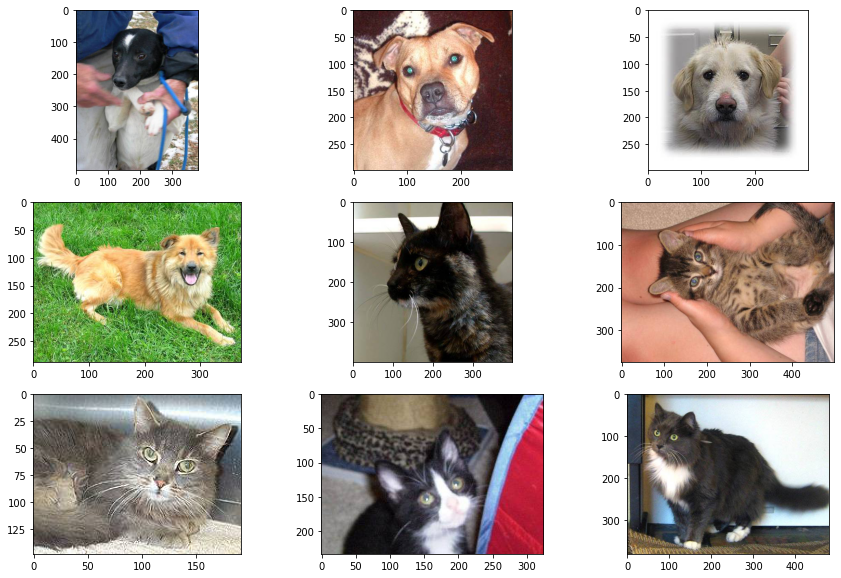

In [22]:
## Display first 9 Images of our test data
plt.figure(figsize= (15,10))
for i in range(9):
  plt.subplot(331 + i)
  image = plt.imread(test_location + str(i+1) + '.jpg')   ### Reads the image from the location specified by filename
  plt.imshow(image)   ## Displays a 2D array as an Image.
plt.show()

Lets Play a Game...



Enter any random Image number from 1 to 12,500:  600


Its a Cat



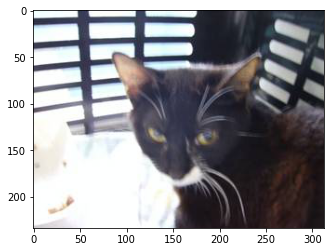

Do you want to continue ([y]/n)? y
Enter any random Image number from 1 to 12,500:  9000


Its a Dog



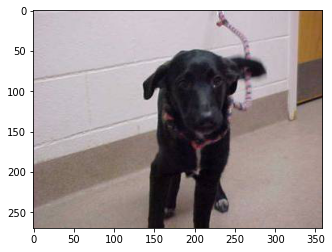

Do you want to continue ([y]/n)? n


Happy Learning!


In [23]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

print('Lets Play a Game...')
print()
def cat_or_dog():
    Index = input('Enter any random Image number from 1 to 12,500: ')
    
    # Load the Image
    image = load_img(test_location + str(Index) + '.jpg', target_size=(224, 224))
    
    image = img_to_array(image) # Convert to an Array
    image = image.reshape(1, 224, 224, 3) # Reshape into a single sample with 3 Channels
    
    # Center pixel data
    image = image.astype('float32') 
    image = image - [123.68, 116.779, 103.939]
    
    ## Predict the Image
    result = model.predict(image)
    if (result[0][0] == 1):
        print('Its a Dog')
        print()
        image = plt.imread(test_location + str(Index) + '.jpg')   
        plt.imshow(image)
        plt.show()
        
        print()
        question()
    else:
        print('Its a Cat')
        print()
        image = plt.imread(test_location + str(Index) + '.jpg')   
        plt.imshow(image)
        plt.show()
        
        print()
        question()
        
def question():
    opinion = input("Do you want to continue ([y]/n)?").lower()
    if opinion == 'y':
        return cat_or_dog()
    else:
        print("Happy Learning!")


cat_or_dog() 

Dare to Challenge the Model?



Enter any random Image number from 1 to 12,500:  6888


This is the Image.. Keep your Answers ready


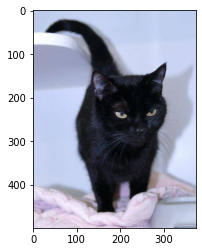

Its a Cat



Do you want to continue ([y]/n)? y
Enter any random Image number from 1 to 12,500:  2222


This is the Image.. Keep your Answers ready


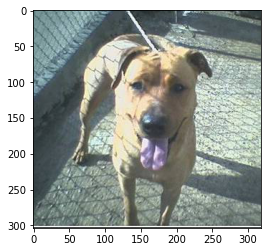

Its a Dog



Do you want to continue ([y]/n)? n


Happy Learning!


In [30]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import time


print('Dare to Challenge the Model?')
print()
def compete():
    Index = input('Enter any random Image number from 1 to 12,500: ')
    
    print('This is the Image.. Keep your Answers ready')
    image = plt.imread(test_location + str(Index) + '.jpg')   
    plt.imshow(image)
    plt.show()
    
    time.sleep(7)
    
    # Load the Image
    image = load_img(test_location + str(Index) + '.jpg', target_size=(224, 224))
    
    image = img_to_array(image) # Convert to an Array
    image = image.reshape(1, 224, 224, 3) # Reshape into a single sample with 3 Channels
    
    # Center pixel data
    image = image.astype('float32') 
    image = image - [123.68, 116.779, 103.939]
    
    ## Predict the Image
    result = model.predict(image)
    if (result[0][0] == 1):
        print('Its a Dog')
        print()
        question()
    else:
        print('Its a Cat')
        print()
        question()
        
def question():
    opinion = input("Do you want to continue ([y]/n)?").lower()
    if opinion == 'y':
        return compete()
    else:
        print("Happy Learning!")


compete() 